In [2]:
from scipy.io import loadmat
from matplotlib.pyplot import (
    figure,
    subplot,
    plot,
    xlabel,
    ylabel,
    title,
    yticks,
    show,
    legend,
    imshow,
    cm,
)
import scipy.linalg as linalg
from scipy.linalg import svd
import matplotlib.pyplot as plt
import numpy as np
import xlrd
import pandas as pd
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [3]:
file_path = r"C:\Users\Dell\Desktop\Git\Machine-Learning-report1\MAIN_Movies_DS.xls"
doc = xlrd.open_workbook(file_path).sheet_by_index(0)

In [4]:
# Extract attribute names
attributeNames = doc.row_values(0, 2, 10)

# Extract MPAA names to python list, then encode with integers (dict)
mpaa = doc.col_values(3, 2, 636)
mpaa_name = sorted(set(mpaa))  # set because it deletes the duplicates
mpaaDict = dict(zip(mpaa_name, range(5)))

# Extract names to python list, then encode with integers (dict)
# the column Genre was moved to this position in excel
genre = doc.col_values(2, 2, 636)
genre_name = sorted(set(genre))
genreDict = dict(zip(genre_name, range(18)))

title = doc.col_values(1, 2, 636)
title_name = sorted(set(title))
titleDict = dict(zip(title_name, range(627)))

rating = doc.col_values(8, 2, 636)
rating_name = sorted(set(rating))
ratDict = dict(zip(rating_name, range(627)))

Creating y_vectors to project the data on them (I think)


In [5]:
# Extract vector y, convert to NumPy array
y_mpaa = np.array([mpaaDict[value] for value in mpaa])
y_genre = np.array([genreDict[value] for value in genre])
y_title = np.array([titleDict[value] for value in title])
y_rat = np.array([ratDict[value] for value in rating])

Main dataframe to use for classification and regression


In [6]:
# Create a dataframe from the data
data = pd.DataFrame(
    {
        "MPAA_Rating": y_mpaa,
        "genre": y_genre,
        "title": y_title,
        "Budget": doc.col_values(4, 2, 636),
        "Gross": doc.col_values(5, 2, 636),
        "release_date": doc.col_values(6, 2, 636),
        "runtime": doc.col_values(7, 2, 636),
        "rating": doc.col_values(8, 2, 636),
        "rating_count": doc.col_values(9, 2, 636),
    }
)

In [7]:
# DATA CLEANING
# Remove duplicates based on the "title" column
data = data.drop_duplicates(subset="title", keep="first")

In [8]:
%store data

Stored 'data' (DataFrame)


In [9]:
# Extract X and y from the cleaned dataframe
X = data[
    [
        "MPAA_Rating",
        "genre",
        "Budget",
        "Gross",
        "release_date",
        "runtime",
        "rating",
        "rating_count",
    ]
].values
y_mpaa = data["MPAA_Rating"].values
y_genre = data["genre"].values
y_gross = data["Gross"].values > 4 * data["Budget"].values
y_rat = data["rating"].values > 7

N_mpaa = len(y_mpaa)
N_genre = len(y_genre)
M = len(attributeNames)
C_mpaa = len(mpaa_name)
C_genre = len(genre_name)

In [15]:
%store X

Stored 'X' (ndarray)


In [10]:
# Creating dictionaries
genreNames = [gen for gen in genreDict]
mpaaNames = [mpa for mpa in mpaaDict]
ratingNames = [rat for rat in ratDict]

# Select subset of digits classes to be inspected
class_mask = np.zeros(N_mpaa).astype(bool)

# Selection of the genree to visualize
# genres = range(18)
genres = [0, 2, 9, 15]
# mpaas = [1, 3]
# gross = [0, 1]
# ratings = [0, 1, 2, 3]

In [11]:
# =============================================================================
# for v in gross:
#     cmsk = y_gross == v
#     class_mask = class_mask | cmsk
# =============================================================================

# =============================================================================
# for v in ratings:
#     cmsk = y_rat == v
#     class_mask = class_mask | cmsk
# =============================================================================

for v in genres:
    cmsk = y_genre == v
    class_mask = class_mask | cmsk

# =============================================================================
# for v in mpaas:
#     cmsk = y_mpaa == v
#     class_mask = class_mask | cmsk
# =============================================================================
X = X[class_mask, :]
# y_mpaa = y_mpaa[class_mask]
y_genre = y_genre[class_mask]
# y_gross = y_gross[class_mask]
# y_rat = y_rat[class_mask]

In [12]:
N = X.shape[0]

PCA


In [13]:
## PCA
Xc = X - np.ones((N, 1)) * X.mean(axis=0)
Xc = Xc * (1 / np.std(X, 0))
# PCA by computing SVD of Y
U, S, V = svd(Xc, full_matrices=False)

# Compute variance explained by principal components
rho = (S * S) / (S * S).sum()

# Project data onto principal component space
Z = Xc @ V

# threshold = sum(rho[:4])
threshold = 0.8

Plotting


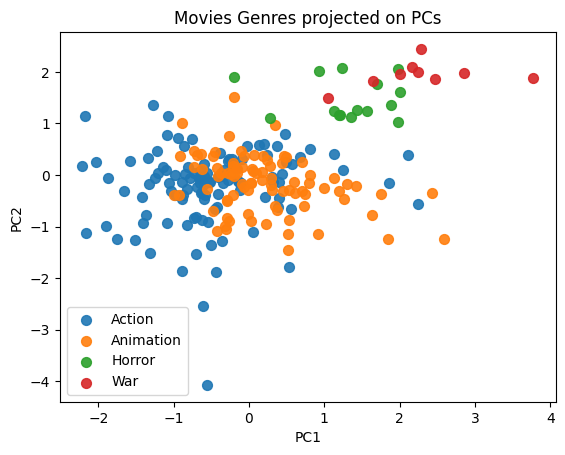

In [14]:
# # Create a new figure with 2D projection
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title("Movies Genres projected on PCs")

# GENRES
for c in genres:
    # Select indices belonging to class c
    class_mask = y_genre == c
    ax.scatter(
        Z[class_mask, 0],
        Z[class_mask, 1],
        marker="o",
        s=50,
        alpha=0.9,
        label=genreNames[c],
    )

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

plt.legend()
# Show the 3D plot
plt.show()